In [1]:
# import pandas
import pandas as pd

# import Kmeans 
from sklearn.cluster import KMeans

# import numpy
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt

# set figure size
plt.rcParams["figure.figsize"] = (12,8)

In [43]:
# Load dataframe
df = pd.read_csv('https://raw.githubusercontent.com/lucko515/clustering-python/master/Customer%20in%20Mall%20clusterng/Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Objective: 
- Fit K-Means, 
- find optimal number of clusters using elbow rule, 
- and plot clusters.

To simplify plotting in 2-D, we can create clustering model based on the last two columns of the dataset. There are ways to lower the dimension of your data so it can plotted in two dimensions and we will get to those in the beginning of next week.

We shouldn't forget to scale the data using some technique from sklearn, even though, it's **not a must** in this case because we take only the last two columns and they have similar scale.

- K-Means

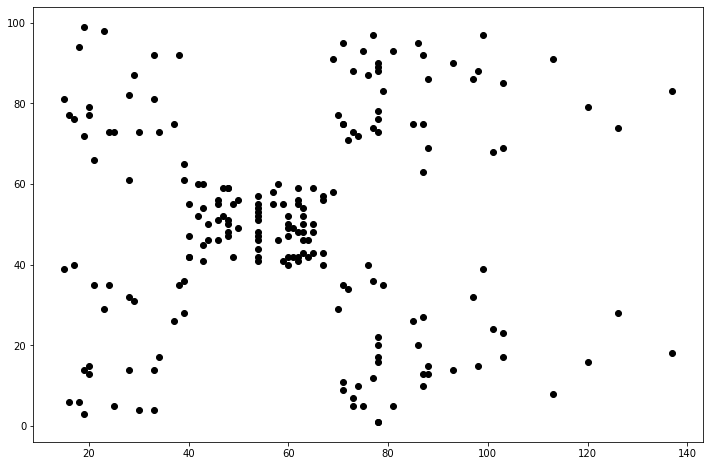

In [44]:
# Let's plot the information from the last 2 columns in a scatterplot
X, y = df[['Annual Income (k$)', 'Spending Score (1-100)']].to_numpy(), np.arange(200)
plt.scatter(X[:,0], X[:,1] , marker = 'o', color = 'black')
plt.show()

In [47]:
# Based on the scatterplot above, the optimal number of clusters seems to be 5

- plot the elbow rule




In [45]:
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

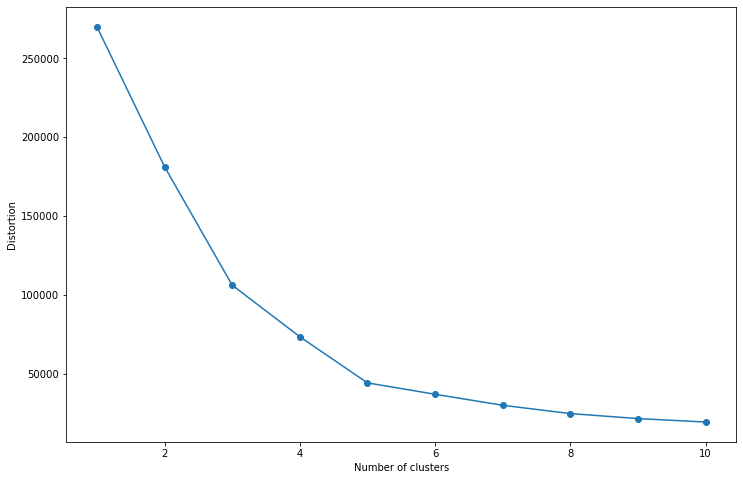

In [46]:
# elbow rule
plot_distortion(X,max_clusters=10)

In [ ]:
# It looks like 5 is our elbow point.

* fit model with optimal number of clusters

In [48]:
km = KMeans(n_clusters=5,
            n_init=10,
            random_state=0)

In [49]:
y_km = km.fit_predict(X)

* define function plot_clusters (similarly to what we have done in the walkthrough)

In [50]:
 def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

* plot clusters

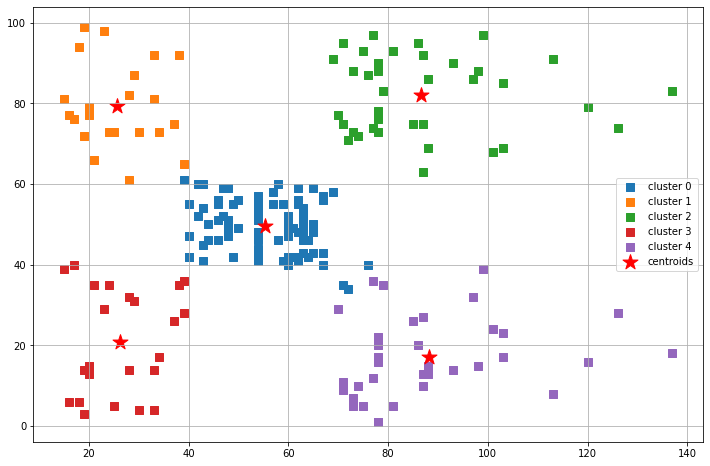

In [51]:
# plot clustering result
plot_clusters(X, y_km, plt_cluster_centers= True)